<a href="https://colab.research.google.com/github/Britojuliano99/Britojuliano99/blob/main/Transferencia_de_calor_Ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd

#Funções para calcular os coeficientes de transferencia de calor
#Convecção interna
#Convecção Natural

In [2]:
def hconvectivo_aquecimento_turbulento(T,m,D,n):
    cp=4180
    k=0.64
    pi=3.14
    u_in=np.zeros((n),dtype=np.float128)
    Re_in=np.zeros((n),dtype=np.float128)
    Pr_in=np.zeros((n),dtype=np.float128)
    Nu_in=np.zeros((n),dtype=np.float128)
    h=np.zeros((n),dtype=np.float128)
    
    u_in[:]=(289+8*(T[:]-300))*10**-6
    Re_in[:]=(4*m)/(u_in[:]*pi*D)
    Pr_in[:]=5.83-0.05*(T[:]-300)
    if Re_in.mean() >10000:
      Nu_in[:]=0.023*(Re_in[:]**(0.8))*(Pr_in[:]**(0.4))
    else:
      Nu_in[:]=0.023*(Re_in[:]**(0.8))*(Pr_in[:]**(0.4))
    h[:]=Nu_in[:]*k/D
    return h
  
def hconvectivo_natural(T,D,Ts):
    g=9.81
    cp=4180
    k=0.64
    rho=1000
    
    Ra_out=np.float128
    u=np.float128
    v=np.float128
    Pr_out=np.float128
    alpha=np.float128
    beta_out=np.float128
    u=(289+8*(T-300))*10**(-6)
    Pr_out=5.83-0.05*(T-300)
    v=u/Pr_out
    alpha= k/(rho*cp)
    beta_out=(276.1+6.77*(T-300))*10**-6
    Ra_out=(g*beta_out*(abs(T-Ts))*D**3)/(v*alpha)
    Nu_out=(0.6+((0.387*(Ra_out)**(1/6))/(1+((0.559/Pr_out)**(9/16)))**(8/27)))**2
    h=Nu_out*k/D
   
    return h


#Usando a media para calcular


In [3]:
def hconvectivo_aquecimento_turbulento2(Ti,ts,m,D,n):
    cp=4180
    k=0.64
    pi=3.14
    T=Ti.mean()
    
    Re_in=np.float128
    
    u_in=453*10**(-6)
    Re_in=(4*m)/(u_in*pi*D)
    Pr_in=5.83-(0.05*(T-300))
    if Re_in >10000:
      Nu_in=0.023*(Re_in**(0.8))*(Pr_in**(0.4))
      h=Nu_in*k/D
      
    else:
      print(Re_in)
      Nu_in=3.66
      h=Nu_in*k/D
    
    if h==np.NAN:
      print("erro em interno")
    return h

def hconvectivo_aquecimento_turbulento2(Ti,m,D,n):
    cp=4180
    k=0.64
    pi=3.14
    c=0.5
    cd=c/D
    dc=D/c
    T=Ti.mean()
    
    Re_in=np.float128
    
    u_in=453*10**(-6)
    Re_in=(4*m)/(u_in*pi*D)
    Pr_in=5.83-(0.05*(T-300))
    
    if Re_in >10000:
      Nu_in=0.023*(Re_in**(0.8))*(Pr_in**(0.4))
      h=Nu_in*k/D
      
    else:
      Nu_in=3.66
      h=Nu_in*k/D
    
      
    return h
def hconvectivo_natural2(T,D,Ts):
    g=9.81
    cp=4180
    k=0.64
    rho=1000
    Ra_out=np.float128
    u=np.float128
    v=np.float128
    Pr_out=np.float128
    alpha=np.float128
    beta_out=np.float128
    u=453*10**(-6)
    Pr_out=5.83-(0.05*(T-300))
    v=u/Pr_out
    alpha= k/(rho*cp)
    beta_out=(276.1+(6.77*(T-300)))*10**-6
    Ra_out=(g*beta_out*(abs(T-Ts))*D**3)/(v*alpha)
    a=(0.387*(Ra_out)**(1/6))
    b=(1+((0.559/Pr_out)**(9/16)))**(8/27)
    Nu_out=(0.6+a/b)**2
    
    h=Nu_out*k/D
    return h

#Função que calcula a tranferencia de calor e retorna 4 valores:
A temperatura do fluido interno para cada instante de tempo;

A temperatura do fluido externo para cada periodo de tempo;

Temperatura que o fluido interno sai;

Tempo total para o resfriamento completo.


In [4]:
def aquecimentoaguadtdx(T0,Ti,m_dot,r,l,e):
    t_final=100000
    dt=0.1
    n=l*10
    dx=l/n
    x=np.linspace(dx/2,l-dx/2,n)
    T=np.ones(n)*Ti
    T1s=np.ones((t_final,n))
    
    
    T0s=np.ones(t_final)*Ti
    Tsaida=np.ones(t_final)
    dTdt = np.zeros(n)
    m_agua=50
    cp=4180
    k_tubo=237
    rho=1000
    Ts=np.ones(n)*(T+T0)/2
    Tempo=0
    Tempo40=0
    q_a=np.zeros(n)
    q_p=np.zeros(n)
    y=np.float128
    ys=np.ones(t_final)
    jbreak=int
    v=np.pi*dx*r**2
    for j in range(0,t_final):
        Ts[:]=(T[:]+T0)/2
        a=hconvectivo_natural(T0,(r+e)*2,Ts)
        b=hconvectivo_aquecimento_turbulento(T,m_dot,r*2,n)
        y=1/(1/b +1/a +((r/k_tubo)*np.log((r+e)/r)))
        ys[j]=y.mean()
        q_a[0]=m_dot*cp*(Ti-T[0])
        q_p[0]=y[0]*2*np.pi*dx*r*(Ti-T[0])
        q_a[1:n]=m_dot*cp*(T[0:n-1]-T[1:n])
        q_p[1:n]=y[1:n]*2*np.pi*dx*r*(T[0:n-1]-T[1:n])  
        dTdt=(q_a+q_p)/(rho*cp*v)
      
        a=(Ti-T[n-1])*cp*m_dot*dt
        
        dT0=a/(cp*m_agua)
        T=T+dTdt*dt
        T0=T0+dT0
        Tsaida[j]=T[n-1]-273.15
        T1s[j,:]=T[:]-273.15
        
        T0s[j]=T0-273.15

        
        if T0.round()==(310):
         Tempo40=round(j*dt/60)
        if T0.round()==Ti:
          Tempo=round(j*dt/60)
          print(j)
          jbreak=j
          break
    print(ys.mean())
    print(Tempo40)
    print(Tempo)
    return T1s,T0s,Tsaida,Tempo,Tempo40

In [11]:
def aquecimentoaguadtdx2(T0,Ti,m_dot,m,r,l,e):
    t_final=100000
    dt=0.1
    n=l*10
    dx=l/n
    x=np.linspace(dx/2,l-dx/2,n)
    Tempos=np.linspace(0,t_final*dt/60,t_final)
    T=np.ones(n)*Ti
    T1s=np.ones((t_final,n))
    
    
    T0s=np.ones(t_final)*(Ti-273.15)
    Tsaida=np.ones(t_final)
    dTdt = np.zeros(n)
    m_agua=m
    cp=4180
    k_tubo=237
    rho=1000
    Ts=np.ones(n)*(T+T0)/2
    Tempo=0
    Tempo40=0
    y=np.float128
    ys=np.ones(t_final)
    jbreak=10000
    dv=np.pi*dx*r**2
    
    
    
    for j in range(0,t_final):
        Ts=(T.mean()+T0)/2
       
        b=hconvectivo_aquecimento_turbulento2(T,m_dot,r*2,n)
        a=hconvectivo_natural2(T0,(r+e)*2,Ts)
        y=1/(1/b +1/a +((r/k_tubo)*np.log((r+e)/r)))
        ys[j]=y
        dTdt[0]=((m_dot*cp*(Ti-T[0]))+(y*2*np.pi*dx*r*(T0-T[0])))/(rho*cp*dv)
        dTdt[1:n]=((m_dot*cp*(T[0:n-1]-T[1:n]))+(y*2*np.pi*r*dx*(T0-T[1:n])))/(rho*cp*np.pi*dv)
        
        a=(Ti-T[n-1])*cp*m_dot*dt
      
        dT0=a/(cp*m_agua)
        T=T+dTdt*dt
        T0=T0+dT0
        Tsaida[j]=T[n-1]-273.15
        T1s[j,:]=T[:]-273.15
        T0s[j]=T0-273.15
        
        if T0.round()==(310):
         Tempo40=round(j*dt/60)
        if T0.round()==Ti:
          Tempo=round(j*dt/60)
          jbreak=j
          break
    #print(ys.mean())
    #print(Tempo40)
    #print(Tempo)
    #print("Gasto de água:",Tempo40*m_dot,"l")
    #fig, ax = plt.subplots(figsize=(10,4))
    #ax.set_xlabel=("Tempo em minutos")
    #ax.set_ylabel=("Temperatura do mosto em °C")
    #ax.plot(Tempos[:jbreak],T0s[:jbreak],label=("Comprimento do Chiller:", l,"Fluxo de água:",m_dot))
   
    #ax.legend()
   
    return T1s,T0s,Tsaida,Tempo,Tempo40

In [12]:
def plot(Tempos,T0s,jbreak,l,m_dot):
  fig, ax = plt.subplots(figsize=(10,4))
  ax.set_xlabel=("Tempo em minutos")
  ax.set_ylabel=("Temperatura do mosto em °C")
  ax.plot(Tempos[:jbreak],T0s[:jbreak],"Comprimento do Chiller(m):", l,"Fluxo de água(kg/s):",m_dot)
   
  ax.legend()

In [21]:
a1=aquecimentoaguadtdx2(370,300,0.1,25,.025,10,0.005)
a2=aquecimentoaguadtdx2(370,300,0.1,25,.025,15,0.005)
a3=aquecimentoaguadtdx2(370,300,0.1,25,.025,20,0.005)
a4=aquecimentoaguadtdx2(370,300,0.1,25,.025,25,0.005)
a5=aquecimentoaguadtdx2(370,300,0.1,25,.025,30,0.005)
a6=aquecimentoaguadtdx2(370,300,0.2,25,.025,30,0.005)
a7=aquecimentoaguadtdx2(370,300,0.3,25,.025,30,0.005)


In [24]:
t_final=100000
dt=0.1
Tempos=np.linspace(0,t_final*dt/60,t_final)
T0sa1=a1[1]
T0sa2=a2[1]
T0sa3=a3[1]
T0sa4=a4[1]
T0sa5=a5[1]
T0sa6=a6[1]
T0sa7=a7[1]

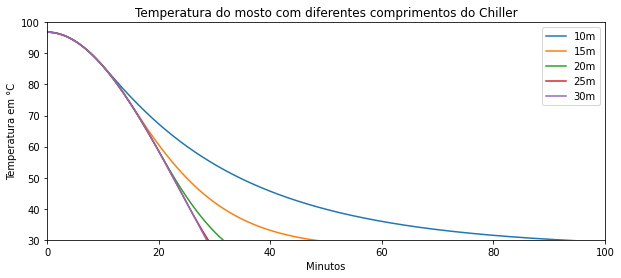

In [25]:


fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Minutos")
ax.set_ylabel("Temperatura em °C")
ax.set_title("Temperatura do mosto com diferentes comprimentos do Chiller")
ax.set_ylim((30,100))
ax.set_xlim((0,100))

plt.plot(Tempos,T0sa1[:100000],label="10m")
plt.plot(Tempos,T0sa2[:100000],label="15m")
plt.plot(Tempos,T0sa3[:100000],label="20m")
plt.plot(Tempos,T0sa4[:100000],label="25m")
plt.plot(Tempos,T0sa5[:100000],label="30m")




ax.legend()

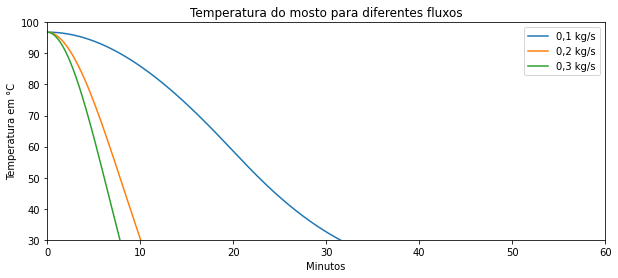

In [28]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Minutos")
ax.set_ylabel("Temperatura em °C")
ax.set_title("Temperatura do mosto para diferentes fluxos")
ax.set_ylim((30,100))
ax.set_xlim((0,60))

plt.plot(Tempos,T0sa3[:100000],label="0,1 kg/s")
plt.plot(Tempos,T0sa6[:100000],label="0,2 kg/s")
plt.plot(Tempos,T0sa7[:100000],label="0,3 kg/s")


ax.legend()

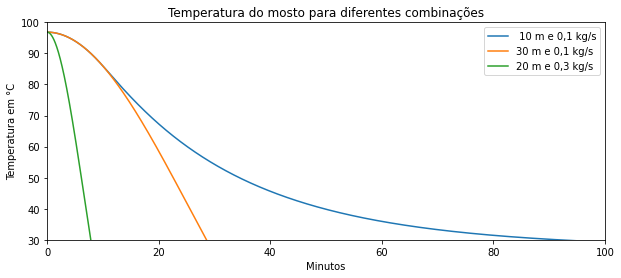

In [37]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Minutos")
ax.set_ylabel("Temperatura em °C")
ax.set_title("Temperatura do mosto para diferentes combinações")
ax.set_ylim((30,100))
ax.set_xlim((0,100))

plt.plot(Tempos,T0sa1[:100000],label=" 10 m e 0,1 kg/s")
plt.plot(Tempos,T0sa5[:100000],label="30 m e 0,1 kg/s")
plt.plot(Tempos,T0sa7[:100000],label="20 m e 0,3 kg/s")


ax.legend()

In [31]:
Tudo=[a1,a2,a3,a4,a5,a6,a7]
df=pd.DataFrame(Tudo,index=["1","2","3","4","5","6","7"],columns=["T1s","T0s","Tsaida","Tempo","Tempo40"])

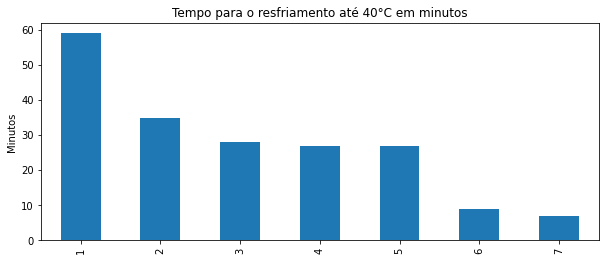

In [35]:
df.sort_values(by="Tempo",ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title("Tempo para o resfriamento até 40°C em minutos")
ax.set_ylabel("Minutos")
df["Tempo40"].plot.bar()

#Plotagem dos graficos

NameError: ignored

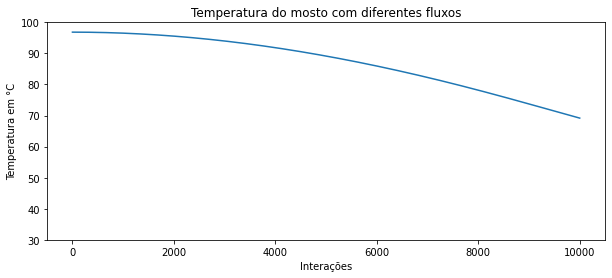

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Interações")
ax.set_ylabel("Temperatura em °C")
ax.set_title("Temperatura do mosto com diferentes fluxos")
ax.set_ylim((30,100))
plt.plot(T0sa2[:10000],label="a2")
plt.plot(T0sb2[:10000],label="b2")
plt.plot(T0sc2[:10000],label="c2")
plt.plot(T0sd2[:10000],label="d2")
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title("Temperatura do mosto para diferentes combinações")
ax.set_ylabel("Temperatura em °C")
ax.set_ylim((30,100))
plt.plot(T0sa1[:10000],label="a1")
plt.plot(T0si1[:10000],label="i1")
plt.plot(T0sd2[:10000],label="d2")
ax.legend()

In [ ]:
a=df.explode("T1s")
a.explode("T0s")
